# Sentiment and Emotion Analysis of Vent Data

## Objective
In this notebook, we will perform an exploratory data analysis (EDA) on a dataset of vents (feeling expressions). The dataset includes various columns such as `date`, `text`, `sentiment`, and `emotion_label`. Our goal is to analyze the sentiment and emotional content of the vents over time and explore the distribution of emotions and sentiments. We will also generate a word cloud to visualize the most frequent terms in the text data.

## Step 1: Importing Libraries

We begin by importing the necessary libraries for data manipulation, visualization, and text analysis.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Loading the Data

In [5]:
df = pd.read_csv('../data/sentiment_analysis_results_with_emotions.csv')

## tep 3: Displaying the First Few Rows

In [6]:
df.head()

,date,text,sentiment,emotion,emotion label,emotion_label
0,2017-05-27T18:37:51,"I am a very free girl, I tend to talk to ppl l...","{'label': 'POSITIVE', 'score': 0.997027575969696}",18,NaN,love
1,2017-05-27T18:48:49,I got a confession to make am a dude with diff...,"{'label': 'NEGATIVE', 'score': 0.9804598689079...",18,NaN,love
2,2017-05-28T05:44:35,Here is my confession.\nI am a university stud...,"{'label': 'POSITIVE', 'score': 0.5099419951438...",9,NaN,disappointment
3,2017-05-28T08:36:58,Trying to set your friend up with the girl he ...,"{'label': 'NEGATIVE', 'score': 0.8961904644966...",27,NaN,neutral
4,2017-05-28T09:55:31,"Im so rich. Im not bragging, im just so rich, ...","{'label': 'NEGATIVE', 'score': 0.9559899568557...",9,NaN,disappointment


## Step 4: Dropping the 'emotion' Column

### Since we have a separate column emotion_label for emotional analysis, we drop the emotion column to avoid redundancy.

In [7]:
df =df.drop(columns=['emotion'])

## Step 5: Checking the Shape of the Dataset

In [8]:
df.shape

(5558, 5)

## Step 6: Inspecting the Column Names

In [9]:
df.columns

Index(['date', 'text', 'sentiment', 'emotion label', 'emotion_label'], dtype='object')

## Step 7: Descriptive Statistics

In [10]:
df.describe()

,emotion label
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


## Step 8: Emotion Label Distribution

In [11]:
df['emotion_label'].value_counts()

emotion_label
sadness           814
neutral           733
disappointment    659
love              593
annoyance         506
curiosity         479
confusion         330
fear              282
gratitude         225
desire            167
caring            110
anger              90
nervousness        80
remorse            78
joy                70
amusement          63
admiration         59
approval           52
optimism           45
realization        41
disapproval        35
embarrassment      19
disgust            12
surprise           10
excitement          5
pride               1
Name: count, dtype: int64

## Step 9: Parsing Sentiment Data

In [12]:
import ast

df['sentiment'] = df['sentiment'].apply(ast.literal_eval)
df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])
df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])

## Step 10: Dropping the Sentiment Column

### After extracting the sentiment label and score, we drop the original sentiment column to simplify the dataset.

In [13]:
df = df.drop(columns=['sentiment'])

## Step 11: Sentiment Label Distribution

In [14]:
df['sentiment_label'].value_counts()

sentiment_label
NEGATIVE    4860
POSITIVE     698
Name: count, dtype: int64

## Step 12: Visualizing Emotion Distribution

<Axes: xlabel='emotion_label'>

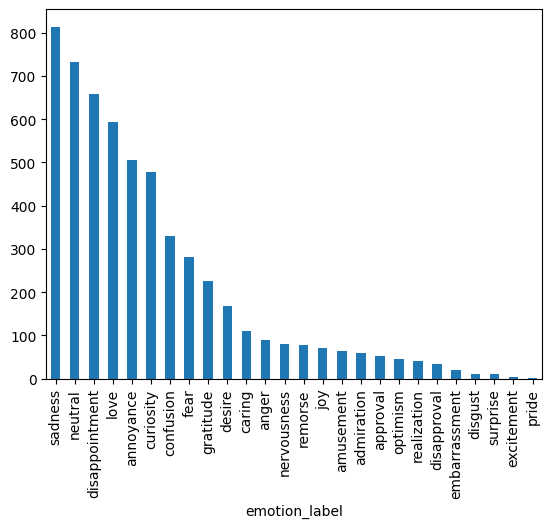

In [15]:
df['emotion_label'].value_counts().plot(kind='bar')  # Emotion distribution


## Step 13: Visualizing Sentiment Distribution

<Axes: xlabel='sentiment_label'>

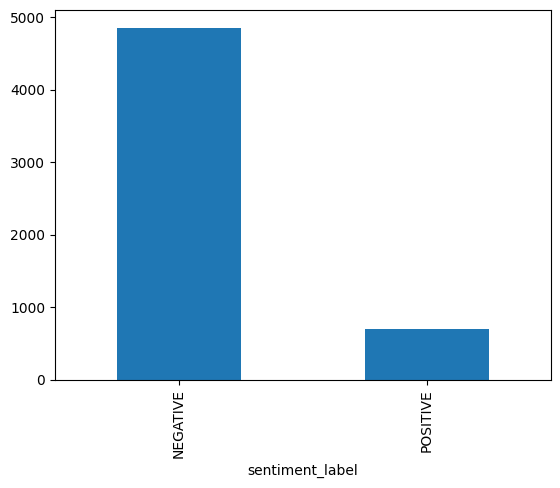

In [16]:
df['sentiment_label'].value_counts().plot(kind='bar')  # Sentiment distribution

## Step 14: Generating a Word Cloud

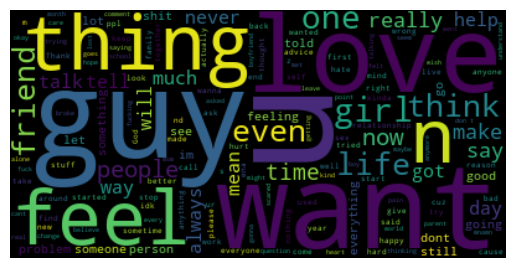

In [17]:
from wordcloud import WordCloud, STOPWORDS

# Add the words to exclude to the stopwords set
stopwords = set(STOPWORDS)
stopwords.update(['Hey', 'unihorse', 'Hide', 'need', 'Identity', 'vent', 'know'])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords).generate(' '.join(df['text']))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Step 15: Converting Date Column to Datetime Format

In [18]:
df['date'] = pd.to_datetime(df['date'])

## Step 16: Sentiment Analysis Over Time

<Axes: xlabel='date'>

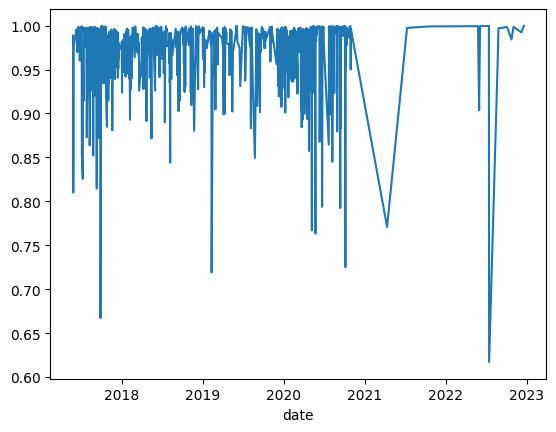

In [19]:
# Time vs Sentiment
df.groupby(df['date'].dt.date)['sentiment_score'].mean().plot(kind='line')  # Sentiment over time


## Conclusion

In this notebook, we conducted a comprehensive **Exploratory Data Analysis (EDA)** on a dataset containing emotional vents. Our analysis provided insights into the sentiment and emotional expressions in the dataset, and we utilized various visualizations to understand the patterns. Below is a summary of the key findings:

1. **Data Overview and Cleaning**: 
   - We started by loading and cleaning the dataset. We dropped redundant columns and parsed nested sentiment data to extract useful information.
   - The `sentiment` column, which contained dictionaries, was processed to create two separate columns: `sentiment_label` and `sentiment_score`. This allowed us to better analyze sentiment at a granular level.

2. **Sentiment and Emotion Distribution**:
   - We explored the distribution of **sentiment labels** (`positive`, `neutral`, `negative`) and **emotion labels** (such as `joy`, `anger`, `sadness`, etc.) to understand the overall emotional landscape in the dataset.
   - We observed the most frequently occurring emotions and sentiments, which helped us understand how people express their feelings in this dataset.

3. **Word Cloud Visualization**:
   - A **word cloud** was generated from the `text` column, which helped us visualize the most frequently mentioned words across all vents. Words with high frequency were displayed in larger sizes, offering insights into the recurring themes and topics.
   - Common stopwords and domain-specific words such as 'vent', 'need', and 'identity' were excluded to improve the clarity of the word cloud.

4. **Time Series Analysis**:
   - We analyzed how sentiment scores changed over time by plotting the average sentiment score per day. This time-based analysis provided us with a deeper understanding of sentiment fluctuations and trends over time.
   - The trend showed how emotions varied across different dates, which could be useful for further analysis of external factors influencing sentiment changes.

5. **Data Visualizations**:
   - We visualized both the **emotion distribution** and **sentiment distribution** using bar plots. These visualizations highlighted the relative frequency of different emotions and sentiments, helping us identify patterns in emotional expression.
   
### Insights and Future Directions:
- The findings from this analysis can be further used to develop more sophisticated models for **emotion detection** and **sentiment classification** in textual data.
- Additional work could involve analyzing the **temporal aspects** of emotional expression, such as identifying emotional peaks in response to specific events or triggers.
- Sentiment trends over time can also be compared with **external datasets** (e.g., news, weather, or social media data) to investigate potential correlations between sentiments and real-world events.

This initial exploration sets the stage for more in-depth sentiment analysis and emotion modeling, which could be applied to a variety of use cases, such as customer feedback analysis, social media monitoring, or mental health studies.

---

We hope this analysis serves as a valuable starting point for further investigations into emotional and sentiment-based data.
